In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!pip3 install -U tensorflow==2.0.0 --quiet


     |████████████████████████████████| 86.3MB 74kB/s 
     |████████████████████████████████| 450kB 52.6MB/s 
     |████████████████████████████████| 3.8MB 48.7MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.2 which is incompatible.


In [0]:
import tensorflow as tf
import h5py

In [0]:
f = h5py.File("/gdrive/My Drive/Neural Network Project/SVHN_single_grey1.h5")

In [33]:
print("Shape for train X:")
print(f[X_train].shape)
print("Shape for val X:")
print(f[X_val].shape)
print("Shape for test X:")
print(f[X_test].shape)
print("Shape for test Y:")
print(f[y_test].shape)
print("Shape for train Y:")
print(f[y_train].shape)
print("Shape for val Y:")
print(f[y_val].shape)

Shape for train X:
(42000, 32, 32)
Shape for val X:
(60000, 32, 32)
Shape for test X:
(18000, 32, 32)
Shape for test Y:
(18000,)
Shape for train Y:
(42000,)
Shape for val Y:
(60000,)


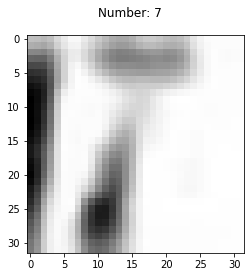

In [21]:
#Let's review the data
import numpy as np

import matplotlib.pyplot as plt
img_num = np.random.randint(0, f[X_test].shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(f[X_test][img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(f[y_test][img_num]))
plt.show()

In [22]:
f[X_train].dtype

dtype('<f4')

In [0]:
trainX_np=np.array(f[X_train])
testX_np=np.array(f[X_test])
valX_np=np.array(f[X_val])
valy_np=np.array(f[y_val])

trainy_np=np.array(f[y_train])
testy_np=np.array(f[y_test])

In [0]:
#@title Perform KNN on datasets


In [0]:
# Changing dimensions to N x D = 32x32
# Number of samples you want in training data. 42,000 is max.

x_tr=[]
for i in range(42000):
    x_tr.append(trainX_np[i,:].flatten())
x_val = []
for i in range(60000):
    x_val.append(valX_np[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(testX_np[i,:].flatten())

In [41]:
print(len(x_tr),len(x_tr[0]))
print(len(x_te),len(x_te[0]))

42000 1024
18000 1024


In [0]:
class NN:
    def __init__(self):
        pass
    
    # Memorize the training data    
    def train(self, X, y):
        # X is 2D if size N x D = 32x32, so each row is an example
        # y is 1D of size N
        self.tr_x = X
        self.tr_y = y
        
    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, x):
        # x is of size D = 32x32 for which we want to predict the label
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000 #Setting minimum distance to maximum
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx] 

In [0]:
classifier = NN()

In [0]:
classifier.train(x_tr, trainy_np)

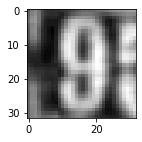

9


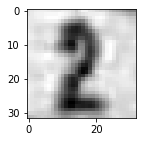

6


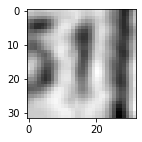

5


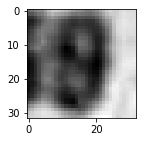

6


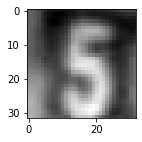

9


In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(testX_np[3],cmap="gray")
plt.show()
print(classifier.predict(x_te[3]))
plt.figure(figsize=(2,2))
plt.imshow(testX_np[2],cmap="gray")
plt.show()
print(classifier.predict(x_te[2]))
plt.figure(figsize=(2,2))
plt.imshow(testX_np[33],cmap="gray")
plt.show()
print(classifier.predict(x_te[33]))
plt.figure(figsize=(2,2))
plt.imshow(testX_np[59],cmap="gray")
plt.show()
print(classifier.predict(x_te[59]))
plt.figure(figsize=(2,2))
plt.imshow(testX_np[36],cmap="gray")
plt.show()
print(classifier.predict(x_te[36]))

In [0]:
#@title Work with deep neural methods


In [0]:
trainX=tf.convert_to_tensor(value=f[X_train])
testX=tf.convert_to_tensor(value=f[X_test])
valX=tf.convert_to_tensor(value=f[X_val])
valy=tf.convert_to_tensor(value=f[y_val])

trainy=tf.convert_to_tensor(value=f[y_train])
testy=tf.convert_to_tensor(value=f[y_test])

In [0]:
#Convert labels to one hot encoding
trainy = tf.keras.utils.to_categorical(trainy, num_classes=10)
testy = tf.keras.utils.to_categorical(testy, num_classes=10)
valy = tf.keras.utils.to_categorical(valy, num_classes=10)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(500, activation='relu'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(250, activation='relu'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(125, activation='relu'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [0]:
#Add 5th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
#adam = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 500)               512500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                7560      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1

In [115]:
model.fit(trainX,trainy,          
          validation_data=(valX,valy),
          epochs=5,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 22s 517us/sample - loss: 0.6802 - accuracy: 0.7855 - val_loss: 0.5449 - val_accuracy: 0.8346
Epoch 2/5
42000/42000 [==============================] - 22s 521us/sample - loss: 0.6402 - accuracy: 0.8003 - val_loss: 0.5395 - val_accuracy: 0.8370
Epoch 3/5
42000/42000 [==============================] - 22s 514us/sample - loss: 0.6096 - accuracy: 0.8089 - val_loss: 0.5025 - val_accuracy: 0.8480
Epoch 4/5
42000/42000 [==============================] - 22s 512us/sample - loss: 0.5781 - accuracy: 0.8178 - val_loss: 0.4714 - val_accuracy: 0.8580
Epoch 5/5
42000/42000 [==============================] - 22s 512us/sample - loss: 0.5572 - accuracy: 0.8251 - val_loss: 0.4650 - val_accuracy: 0.8598


In [0]:
pred_y = model.predict(testX)

In [119]:
model.fit(trainX,trainy,          
          validation_data=(testX,testy),
          epochs=5,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 18s 424us/sample - loss: 0.5332 - accuracy: 0.8309 - val_loss: 0.5681 - val_accuracy: 0.8357
Epoch 2/5
42000/42000 [==============================] - 18s 421us/sample - loss: 0.5254 - accuracy: 0.8345 - val_loss: 0.5722 - val_accuracy: 0.8345
Epoch 3/5
42000/42000 [==============================] - 17s 416us/sample - loss: 0.5009 - accuracy: 0.8413 - val_loss: 0.5421 - val_accuracy: 0.8444
Epoch 4/5
42000/42000 [==============================] - 17s 416us/sample - loss: 0.4861 - accuracy: 0.8452 - val_loss: 0.5470 - val_accuracy: 0.8462
Epoch 5/5
42000/42000 [==============================] - 17s 416us/sample - loss: 0.4718 - accuracy: 0.8523 - val_loss: 0.5176 - val_accuracy: 0.8540
